In [19]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, matthews_corrcoef


# Load the dataset
data = pd.read_csv(r'C:\Users\hadis\OneDrive\My One Drive (Hadiseh)\H Documents\Datascience-Seminar\churn\Dataset\Customertravel.csv')

# Check for missing values (and handle them)
data = data.dropna()

# Define the feature columns (X) and target column (y)
X = data.drop(columns=['Target'])  # Replace 'Target' with the actual name of your target column
y = data['Target']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure the train and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


# Define a function to log models and show detailed results
def log_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_prob)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Classification report
    class_report = classification_report(y_test, y_pred, target_names=["No Churn", "Churn"], output_dict=True)

    # Print detailed results in the requested format
    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")
    print(f"AUC: {auc:.2f}")
    print("\nClassification Report:")
    print(f"{'Class':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}{'Support':<10}")
    print(f"{'No Churn':<10}{class_report['No Churn']['precision']:<10.2f}"
          f"{class_report['No Churn']['recall']:<10.2f}{class_report['No Churn']['f1-score']:<10.2f}"
          f"{int(class_report['No Churn']['support']):<10}")
    print(f"{'Churn':<10}{class_report['Churn']['precision']:<10.2f}"
          f"{class_report['Churn']['recall']:<10.2f}{class_report['Churn']['f1-score']:<10.2f}"
          f"{int(class_report['Churn']['support']):<10}")
    
    # Log metrics in MLflow
    with mlflow.start_run():
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("mcc", mcc)
        mlflow.log_metric("auc", auc)
        mlflow.sklearn.log_model(model, model_name)


# Define all the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(learning_rate=0.1, iterations=1000, depth=10, verbose=0),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Iterate over the models and log their results with detailed metrics
for model_name, model in models.items():
    log_and_evaluate_model(model_name, model, X_train_scaled, X_test_scaled, y_train, y_test)



Results for Logistic Regression:
Accuracy: 0.85
Precision: 0.65
Recall: 0.58
F1 Score: 0.61
MCC: 0.52
AUC: 0.85

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.90      0.92      0.91      153       
Churn     0.65      0.58      0.61      38        


2024/12/07 17:51:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for Decision Tree:
Accuracy: 0.90
Precision: 0.81
Recall: 0.66
F1 Score: 0.72
MCC: 0.67
AUC: 0.90

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.92      0.96      0.94      153       
Churn     0.81      0.66      0.72      38        


2024/12/07 17:51:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for Random Forest:
Accuracy: 0.87
Precision: 0.70
Recall: 0.61
F1 Score: 0.65
MCC: 0.57
AUC: 0.94

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.91      0.93      0.92      153       
Churn     0.70      0.61      0.65      38        


2024/12/07 17:51:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for XGBoost:
Accuracy: 0.90
Precision: 0.81
Recall: 0.66
F1 Score: 0.72
MCC: 0.67
AUC: 0.96

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.92      0.96      0.94      153       
Churn     0.81      0.66      0.72      38        


2024/12/07 17:51:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for Extra Trees Classifier:
Accuracy: 0.86
Precision: 0.68
Recall: 0.55
F1 Score: 0.61
MCC: 0.53
AUC: 0.91

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.89      0.93      0.91      153       
Churn     0.68      0.55      0.61      38        


2024/12/07 17:51:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\hadis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Results for AdaBoost:
Accuracy: 0.82
Precision: 0.55
Recall: 0.45
F1 Score: 0.49
MCC: 0.39
AUC: 0.91

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.87      0.91      0.89      153       
Churn     0.55      0.45      0.49      38        


2024/12/07 17:52:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for CatBoost:
Accuracy: 0.90
Precision: 0.79
Recall: 0.68
F1 Score: 0.73
MCC: 0.67
AUC: 0.94

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.92      0.95      0.94      153       
Churn     0.79      0.68      0.73      38        


2024/12/07 17:52:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for SVM:
Accuracy: 0.84
Precision: 0.62
Recall: 0.53
F1 Score: 0.57
MCC: 0.48
AUC: 0.87

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.89      0.92      0.90      153       
Churn     0.62      0.53      0.57      38        


2024/12/07 17:52:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for KNN:
Accuracy: 0.86
Precision: 0.70
Recall: 0.55
F1 Score: 0.62
MCC: 0.54
AUC: 0.87

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.89      0.94      0.92      153       
Churn     0.70      0.55      0.62      38        


2024/12/07 17:52:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Results for Naive Bayes:
Accuracy: 0.75
Precision: 0.43
Recall: 0.76
F1 Score: 0.55
MCC: 0.42
AUC: 0.76

Classification Report:
Class     Precision Recall    F1 Score  Support   
No Churn  0.93      0.75      0.83      153       
Churn     0.43      0.76      0.55      38        


2024/12/07 17:52:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [24]:
data = pd.read_csv(r'C:\Users\hadis\OneDrive\My One Drive (Hadiseh)\H Documents\Datascience-Seminar\churn\Dataset\Customertravel.csv')

# Display basic information about the dataset
print(data.info())  
print(data.describe()) 
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None
              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000    

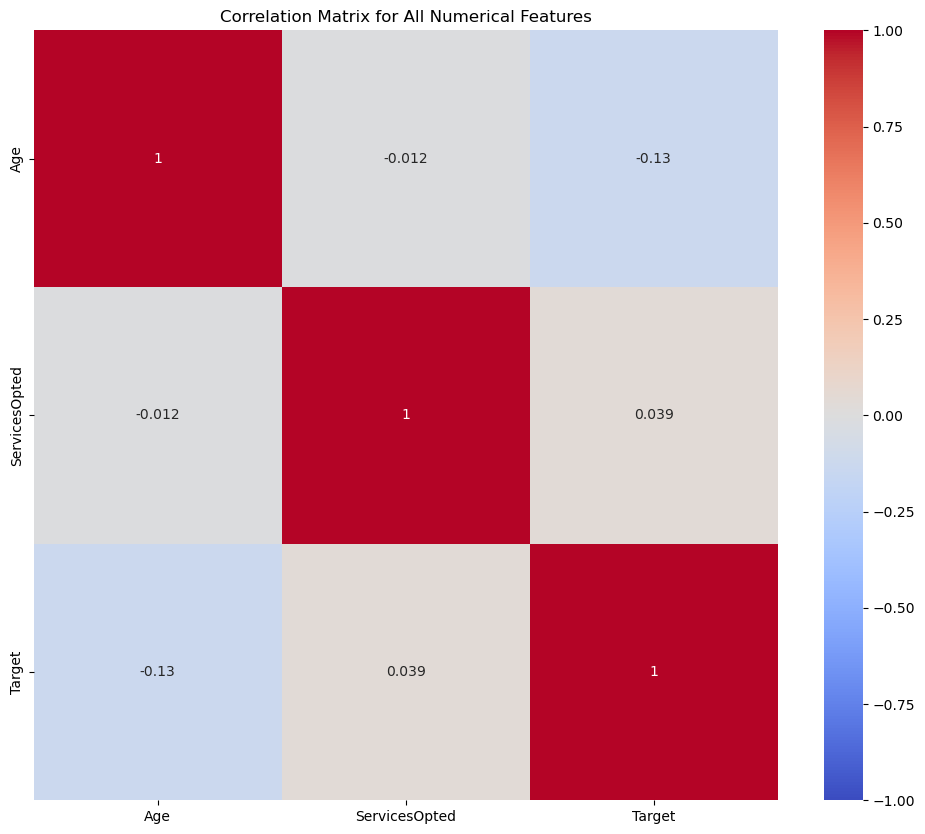

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\hadis\OneDrive\My One Drive (Hadiseh)\H Documents\Datascience-Seminar\churn\Dataset\Customertravel.csv')

# Select all numerical columns dynamically
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix for all numerical features
correlation = numeric_features.corr()

# Visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for All Numerical Features")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None
              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000    

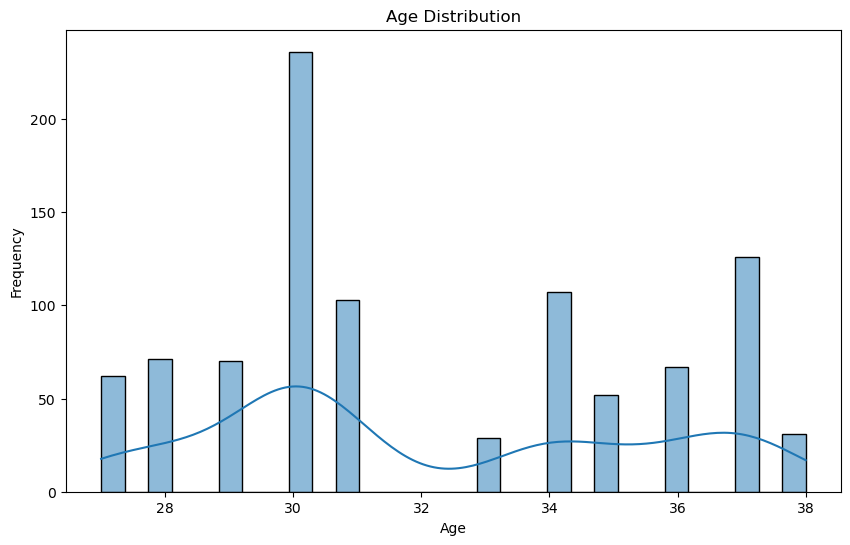

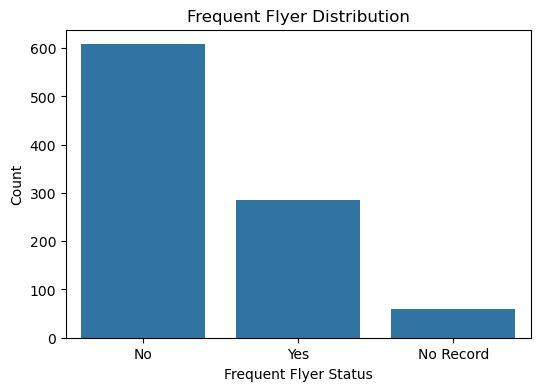

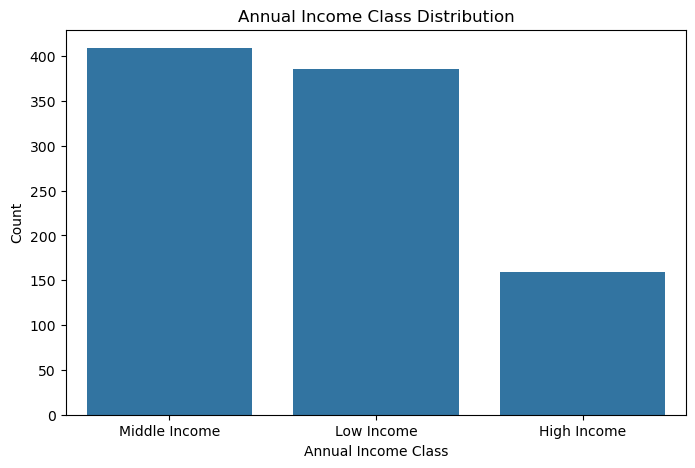

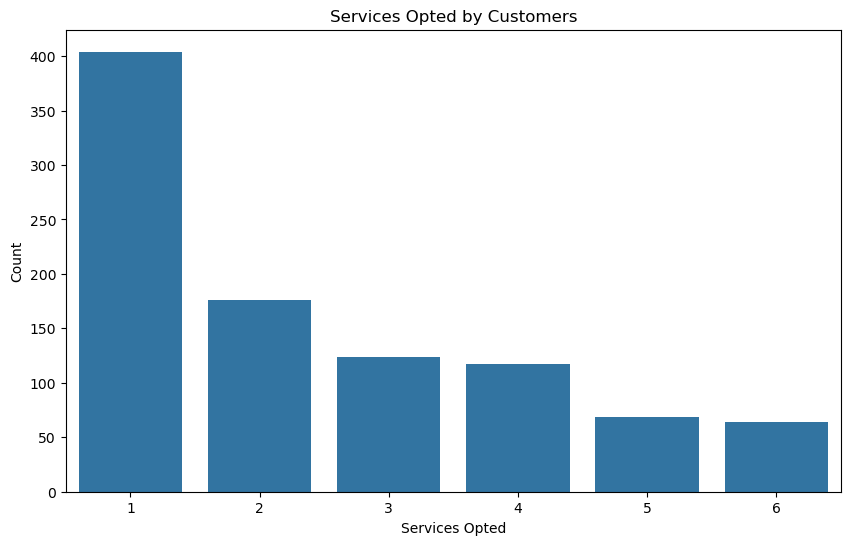

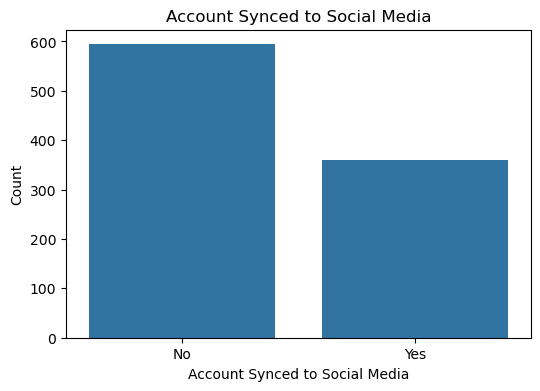

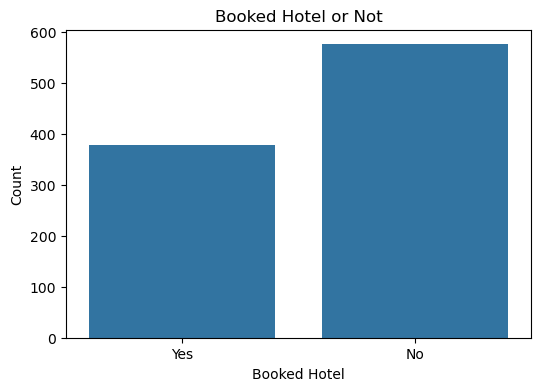

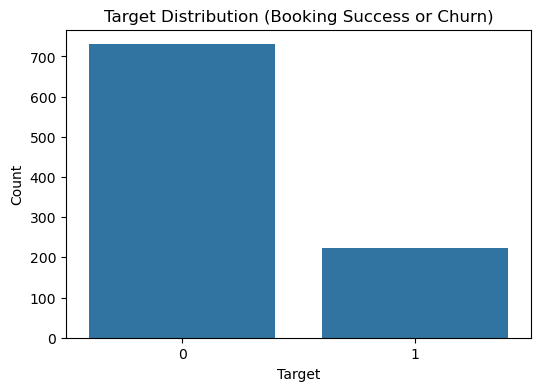

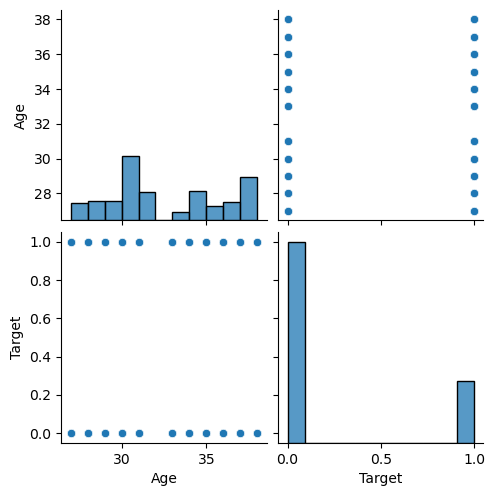

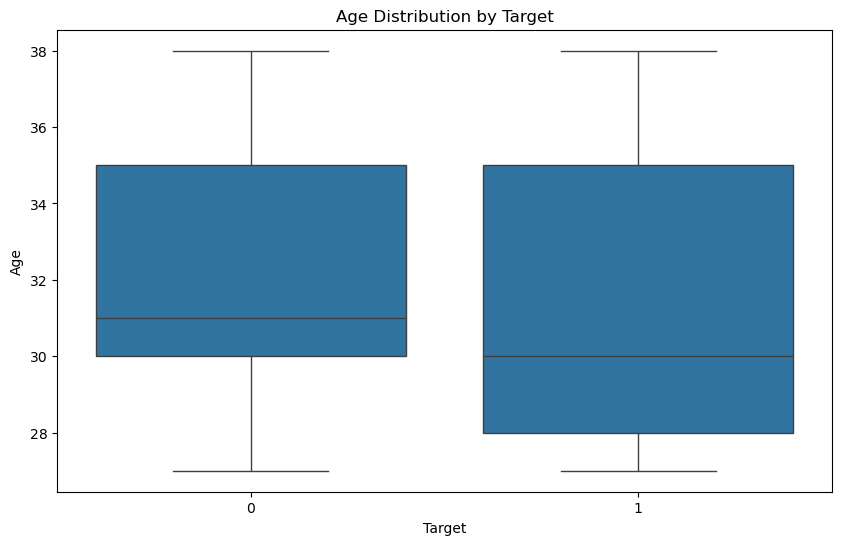

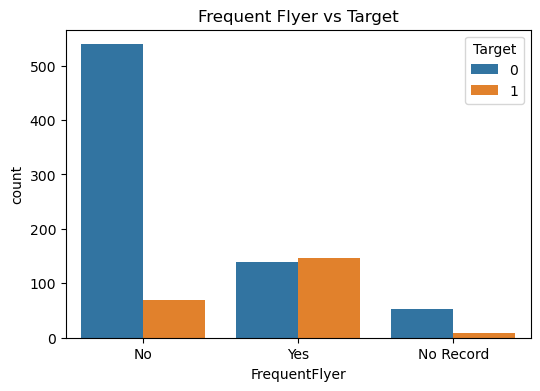

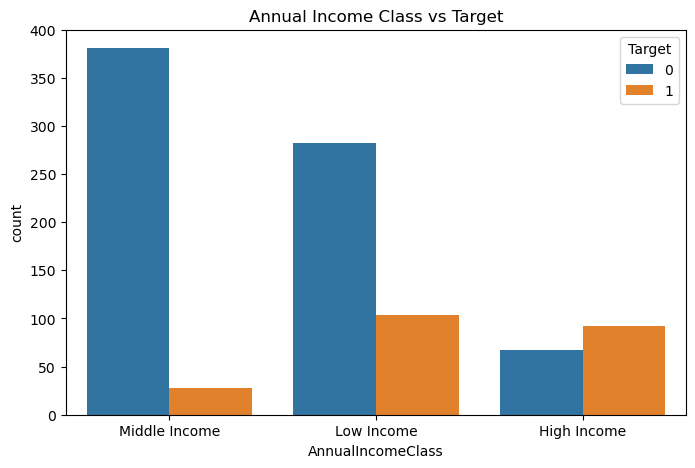

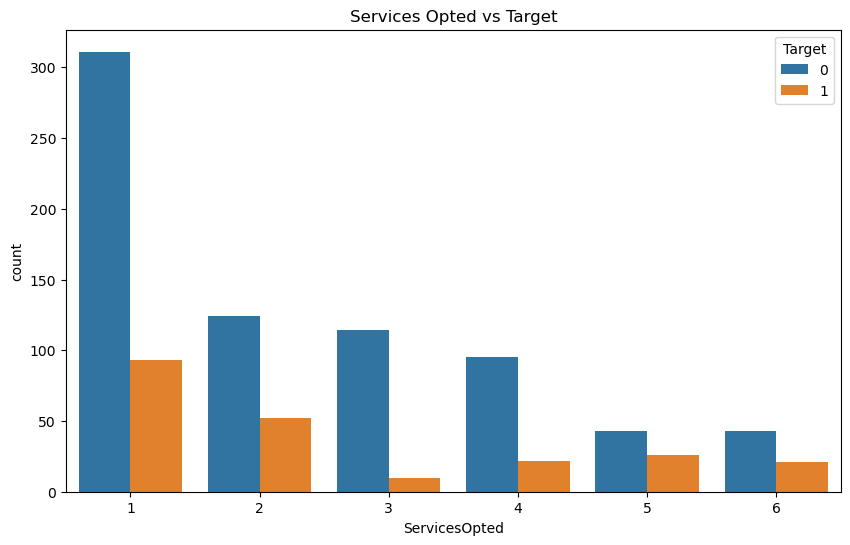

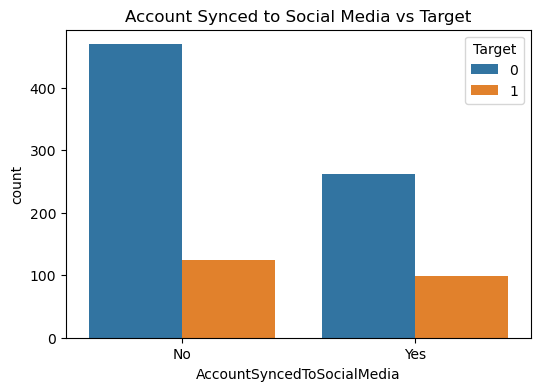

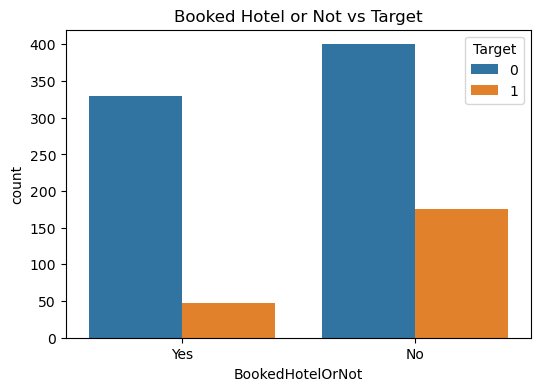

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\hadis\OneDrive\My One Drive (Hadiseh)\H Documents\Datascience-Seminar\churn\Dataset\Customertravel.csv')

# Display basic information about the dataset
print(data.info())  
print(data.describe()) 
print(data.columns)  

# Checking for missing values
print(data.isnull().sum())  # Missing values per column

# **1. Distribution of Age**
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# **2. Frequent Flyer Distribution**
plt.figure(figsize=(6, 4))
sns.countplot(x='FrequentFlyer', data=data)
plt.title("Frequent Flyer Distribution")
plt.xlabel("Frequent Flyer Status")
plt.ylabel("Count")
plt.show()

# **3. Annual Income Class Distribution**
plt.figure(figsize=(8, 5))
sns.countplot(x='AnnualIncomeClass', data=data)
plt.title("Annual Income Class Distribution")
plt.xlabel("Annual Income Class")
plt.ylabel("Count")
plt.show()

# **4. Services Opted by Customers**
plt.figure(figsize=(10, 6))
sns.countplot(x='ServicesOpted', data=data)
plt.title("Services Opted by Customers")
plt.xlabel("Services Opted")
plt.ylabel("Count")
plt.show()

# **5. Account Synced to Social Media (Binary Variable)**
plt.figure(figsize=(6, 4))
sns.countplot(x='AccountSyncedToSocialMedia', data=data)
plt.title("Account Synced to Social Media")
plt.xlabel("Account Synced to Social Media")
plt.ylabel("Count")
plt.show()

# **6. Booked Hotel or Not**
plt.figure(figsize=(6, 4))
sns.countplot(x='BookedHotelOrNot', data=data)
plt.title("Booked Hotel or Not")
plt.xlabel("Booked Hotel")
plt.ylabel("Count")
plt.show()

# **7. Distribution of Target Variable (e.g., Booking Success or Churn)**
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=data)
plt.title("Target Distribution (Booking Success or Churn)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# **9. Pairplot for Visualizing Relationships (Optional)**
# This is useful if we want to see relationships between features (e.g., Age vs Target)
sns.pairplot(data[['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'Target']])
plt.show()

# **10. Grouped Analysis (Target vs other features)**
# Group data by 'Target' and look at distributions across other features

# Age vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=data)
plt.title("Age Distribution by Target")
plt.show()

# FrequentFlyer vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x='FrequentFlyer', hue='Target', data=data)
plt.title("Frequent Flyer vs Target")
plt.show()

# AnnualIncomeClass vs Target
plt.figure(figsize=(8, 5))
sns.countplot(x='AnnualIncomeClass', hue='Target', data=data)
plt.title("Annual Income Class vs Target")
plt.show()

# ServicesOpted vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='ServicesOpted', hue='Target', data=data)
plt.title("Services Opted vs Target")
plt.show()

# AccountSyncedToSocialMedia vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x='AccountSyncedToSocialMedia', hue='Target', data=data)
plt.title("Account Synced to Social Media vs Target")
plt.show()

# BookedHotelOrNot vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x='BookedHotelOrNot', hue='Target', data=data)
plt.title("Booked Hotel or Not vs Target")
plt.show()
